In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df=pd.read_csv("./data/TG_STAID002759.txt", parse_dates=True, index_col=1)
df.rename(columns = {' SOUID': 'source', '   TG':"temp", ' Q_TG': 'QTG'}, inplace=True)

In [3]:
missing = pd.date_range('1945-04-25', periods=195, freq='D')  # solution for loops from Aron
year44 = pd.date_range('1944-04-25', periods=195, freq='D')
year46 = pd.date_range('1946-04-25', periods=195, freq='D')
m=0
for i in tqdm(missing):
    df.loc[i,"temp"] = (df.loc[year44[m]]["temp"] + df.loc[year46[m]]["temp"]) / 2
    m += 1

In [4]:
df['tempK']=df['temp']*0.1+273.15 #Kelvin
df=df.drop(['QTG', 'source','temp'],axis=1) #removing all unnecessary columns

In [5]:
df = df[~((df.index.month == 2) & (df.index.day == 29))] #removing all 29 February

#### Stationarising the data
- increasing / decreasing variance can be handled with logs / exponents respectively
- in this case there is no difference in variance as can be seen from the graphs below, the temperature trend is stable

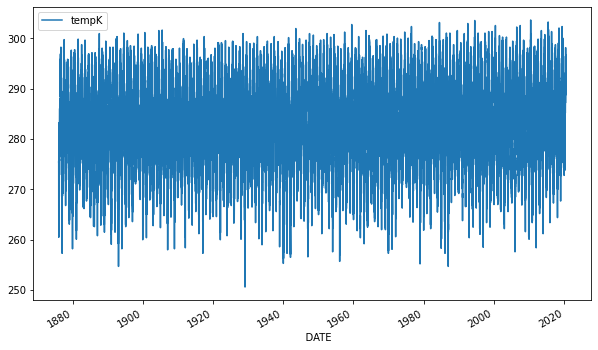

In [6]:
df.plot()

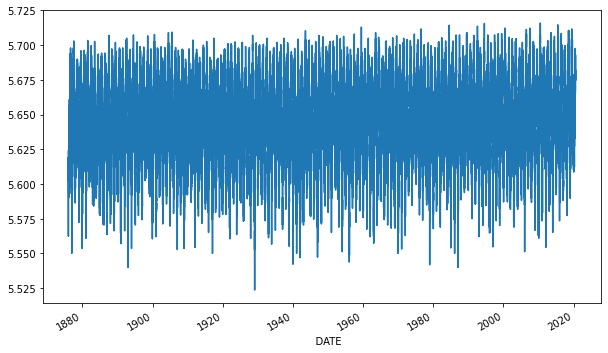

In [7]:
np.log(df['tempK']).plot()

<ipython-input-8-752e0140e4a3>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df.loc['2017':'2020']['tempK'], model='additive', freq=30)


Text(0.5, 1.0, 'Trend for 2017-2020')

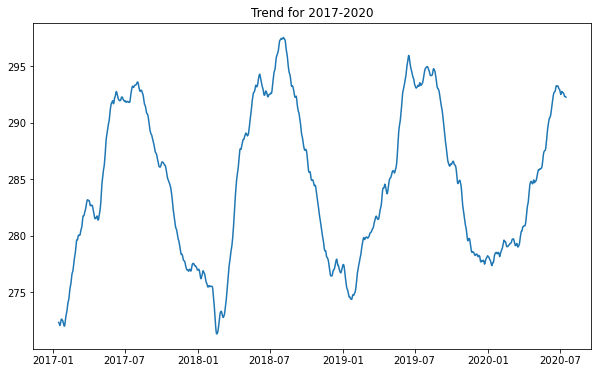

In [8]:
result = seasonal_decompose(df.loc['2017':'2020']['tempK'], model='additive', freq=30)
plt.plot(result.trend)
plt.title('Trend for 2017-2020')

Text(0.5, 1.0, 'Seasonality for 2017-2020')

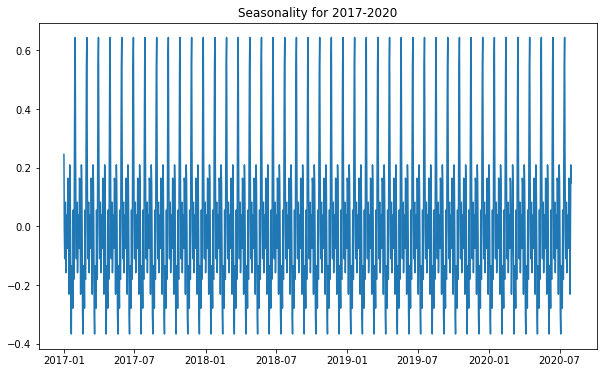

In [9]:
plt.plot(result.seasonal)
plt.title('Seasonality for 2017-2020')

Text(0.5, 1.0, 'Residuals for 2017-2020')

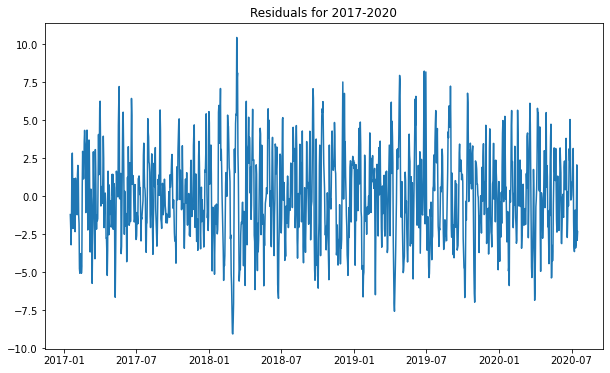

In [10]:
plt.plot(result.resid)
plt.title('Residuals for 2017-2020')

#### Decomposing

In [11]:
def decompose(df):
   
    df['diff_temp']=df['tempK'].diff() #trend
    df['monthly_mean'] = df.groupby(df.index.month)['diff_temp'].transform('mean')  #seasonality
    df['stationary_temp'] = df.diff_temp - df.monthly_mean  #noise
    
    # lag
    week=list(range(1,8))
    for day in week:
        df[f'{day}_shifted_stationary_data'] = df['stationary_temp'] .shift(day)
    df.fillna(method='bfill', inplace=True) 
    return df

In [12]:
decompose(df)

,tempK,diff_temp,monthly_mean,stationary_temp,1_shifted_stationary_data,2_shifted_stationary_data,3_shifted_stationary_data,4_shifted_stationary_data,5_shifted_stationary_data,6_shifted_stationary_data,7_shifted_stationary_data
DATE,,,,,,,,,,,
1876-01-01,275.35,0.3,-0.005496,0.305496,0.305496,0.305496,0.305496,0.305496,0.305496,0.305496,0.305496
1876-01-02,275.65,0.3,-0.005496,0.305496,0.305496,0.305496,0.305496,0.305496,0.305496,0.305496,0.305496
1876-01-03,273.45,-2.2,-0.005496,-2.194504,0.305496,0.305496,0.305496,0.305496,0.305496,0.305496,0.305496
1876-01-04,267.35,-6.1,-0.005496,-6.094504,-2.194504,0.305496,0.305496,0.305496,0.305496,0.305496,0.305496
1876-01-05,263.35,-4.0,-0.005496,-3.994504,-6.094504,-2.194504,0.305496,0.305496,0.305496,0.305496,0.305496
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,293.85,2.0,0.034772,1.965228,-2.634772,0.065228,2.565228,0.865228,-0.334772,-2.534772,-3.134772
2020-07-28,296.15,2.3,0.034772,2.265228,1.965228,-2.634772,0.065228,2.565228,0.865228,-0.334772,-2.534772
2020-07-29,292.35,-3.8,0.034772,-3.834772,2.265228,1.965228,-2.634772,0.065228,2.565228,0.865228,-0.334772


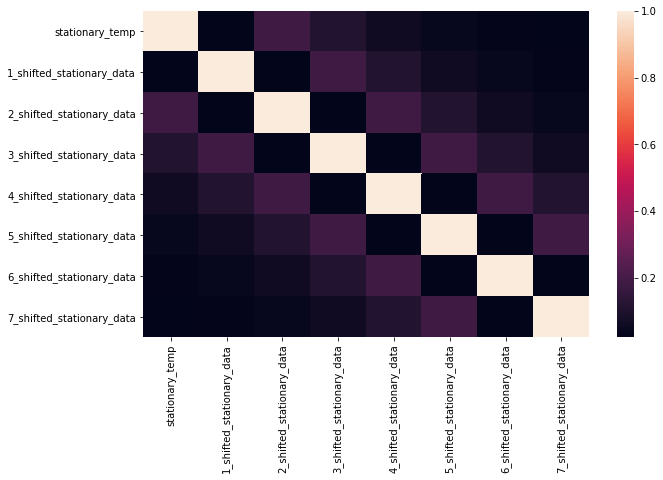

In [13]:
sns.heatmap(df[[x for x in df.columns if 'stationary' in x ]].corr().abs())

#### Train/Test Split

In [14]:
train = df.iloc[:-365].copy()  
test = df.iloc[-365:].copy()  

In [15]:
features = ['2_shifted_stationary_data', '3_shifted_stationary_data', '4_shifted_stationary_data']

In [16]:
Xtrain = df[:-365][features]    
ytrain = df[:-365]['stationary_temp']
Xtest =  df[-365:][features]
ytest = df[-365:]['stationary_temp']
ytest_actual = test['tempK']

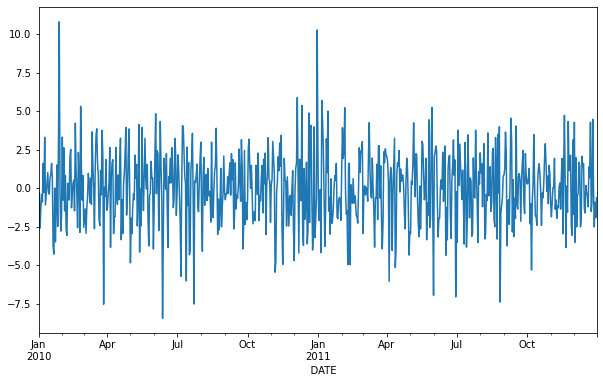

In [17]:
df.loc['2010':'2011']['stationary_temp'].plot()

#### Linear Regression

In [18]:
m = LinearRegression()
m.fit(Xtrain, ytrain)
m.score(Xtrain, ytrain)  #training a model on the decomposed data

0.054525453283070124

In [19]:
ypred = m.predict(Xtest)  #predictiong stationary data  

In [20]:
Xtest

,2_shifted_stationary_data,3_shifted_stationary_data,4_shifted_stationary_data
DATE,,,
2019-08-01,-3.334772,0.865228,1.365228
2019-08-02,-2.834772,-3.334772,0.865228
2019-08-03,-0.510394,-2.834772,-3.334772
2019-08-04,-1.010394,-0.510394,-2.834772
2019-08-05,1.489606,-1.010394,-0.510394
...,...,...,...
2020-07-27,0.065228,2.565228,0.865228
2020-07-28,-2.634772,0.065228,2.565228
2020-07-29,1.965228,-2.634772,0.065228


Text(0.5, 1.0, 'Transformed temperature')

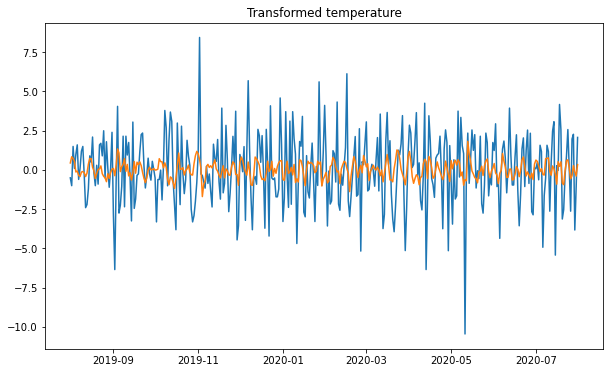

In [21]:
plt.plot(ytest.index, ytest)
plt.plot(ytest.index, ypred) 
plt.title('Transformed temperature')

In [22]:
mean_squared_error(ytest, ypred)

4.724337806436562

#### Recomposing

In [23]:
ypred_actual=np.cumsum(ypred+test['monthly_mean'])+train.iloc[-1]['tempK']

In [24]:
ypred_actual

    DATE
2019-08-01    293.498761
2019-08-02    294.239410
2019-08-03    294.875991
2019-08-04    295.318247
2019-08-05    295.088892
                 ...    
2020-07-27    294.845556
2020-07-28    295.146463
2020-07-29    295.061747
2020-07-30    294.696871
2020-07-31    295.063274
Name: monthly_mean, Length: 365, dtype: float64

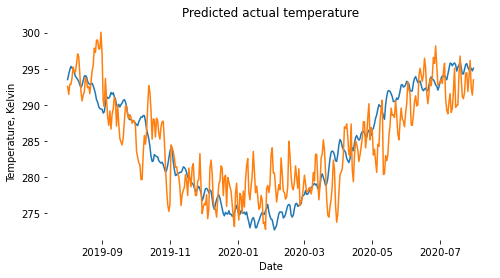

In [34]:
plt.rcParams['figure.figsize'] = (8,4)
plt.plot(ytest.index, ypred_actual)
plt.plot(ytest.index, ytest_actual)
plt.title('Predicted actual temperature')
plt.xlabel('Date')
plt.ylabel('Temperature, Kelvin')
# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.savefig('./data/temperature_prediction.png',dpi=60)

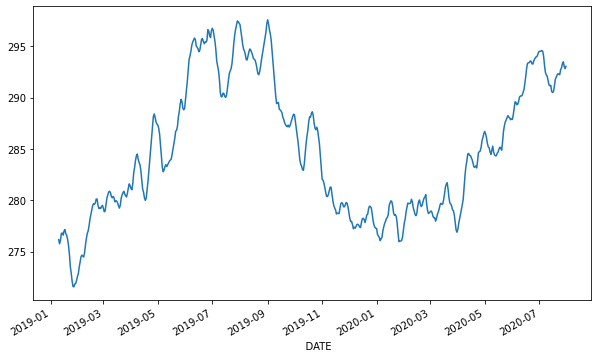

In [28]:
df.loc['2019':'2020']['tempK'].rolling(window=10).mean().plot()